#idea box
-train model with only home stats and determine result comparing the predicted probabilities of both team wining individually.

In [1]:
#mount the google drive to import data in colab
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
import numpy as np
import pandas as pd
from glob import glob

In [3]:
#Function to concat all the csv files into one file
def concat(outfile = 'concat-data.csv'): #outfile = "name of the output file"
    filenames = glob('gdrive/My Drive/Colab Notebooks/epl/dataset/E*.csv') #many filenames have similar pattern 
    dataframes = []
    for files in filenames:
        dataframes.append(pd.read_csv(files,header= 0,
                        encoding= 'unicode_escape'))
    concatDF = pd.concat(dataframes, axis=0,sort=False) #axis=0 to concat vertically
    concatDF.to_csv('gdrive/My Drive/Colab Notebooks/epl/dataset/'+ outfile, index = None) #index=None for no indexing
    
concat() #concat function call
    
data = pd.read_csv('gdrive/My Drive/Colab Notebooks/epl/dataset/concat-data.csv')
tester = pd.read_csv('gdrive/My Drive/Colab Notebooks/epl/dataset/tester.csv')
# data = data.dropna(axis = 'columns', how = 'any',thresh=4000)  #drops the columns with null values 

display(data)
#views the first five lines

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (53,77) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,PSH,PSD,PSA,WHH,WHD,WHA,VCH,VCD,...,AvgAHH,AvgAHA,B365CH,B365CD,B365CA,BWCH,BWCD,BWCA,IWCH,IWCD,IWCA,WHCH,WHCD,WHCA,VCCH,VCCD,VCCA,MaxCH,MaxCD,MaxCA,AvgCH,AvgCD,AvgCA,B365C>2.5,B365C<2.5,PC>2.5,PC<2.5,MaxC>2.5,MaxC<2.5,AvgC>2.5,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
0,E0,10/08/2018,Man United,Leicester,2.0,1.0,H,1.0,0.0,H,A Marriner,8.0,13.0,6.0,4.0,11.0,8.0,2.0,5.0,2.0,1.0,0.0,0.0,1.57,3.90,7.50,1.53,4.00,7.50,1.55,3.80,7.00,1.58,3.93,7.50,1.57,3.80,6.00,1.57,4.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,E0,11/08/2018,Bournemouth,Cardiff,2.0,0.0,H,1.0,0.0,H,K Friend,12.0,10.0,4.0,1.0,11.0,9.0,7.0,4.0,1.0,1.0,0.0,0.0,1.90,3.60,4.50,1.90,3.40,4.40,1.90,3.50,4.10,1.89,3.63,4.58,1.91,3.50,4.00,1.87,3.60,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,E0,11/08/2018,Fulham,Crystal Palace,0.0,2.0,A,0.0,1.0,A,M Dean,15.0,10.0,6.0,9.0,9.0,11.0,5.0,5.0,1.0,2.0,0.0,0.0,2.50,3.40,3.00,2.45,3.30,2.95,2.40,3.30,2.95,2.50,3.46,3.00,2.45,3.30,2.80,2.50,3.40,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,E0,11/08/2018,Huddersfield,Chelsea,0.0,3.0,A,0.0,2.0,A,C Kavanagh,6.0,13.0,1.0,4.0,9.0,8.0,2.0,5.0,2.0,1.0,0.0,0.0,6.50,4.00,1.61,6.25,3.90,1.57,6.20,4.00,1.55,6.41,4.02,1.62,5.80,3.90,1.57,6.50,4.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,E0,11/08/2018,Newcastle,Tottenham,1.0,2.0,A,1.0,2.0,A,M Atkinson,15.0,15.0,2.0,5.0,11.0,12.0,3.0,5.0,2.0,2.0,0.0,0.0,3.90,3.50,2.04,3.80,3.50,2.00,3.70,3.35,2.05,3.83,3.57,2.08,3.80,3.20,2.05,3.90,3.40,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24054,SC0,07/03/2020,Hamilton,Kilmarnock,1.0,0.0,H,0.0,0.0,D,W Collum,11.0,14.0,2.0,5.0,12.0,11.0,6.0,9.0,2.0,2.0,1.0,0.0,3.20,3.40,2.20,3.30,3.40,2.10,3.30,3.20,2.15,3.46,3.47,2.19,3.40,3.30,2.15,3.30,3.40,...,1.95,1.86,3.5,3.40,2.10,3.60,3.40,2.00,3.50,3.30,2.05,3.50,3.5,2.05,3.60,3.5,2.05,3.75,3.59,2.20,3.54,3.38,2.06,2.10,1.72,2.13,1.78,2.20,1.83,2.08,1.73,0.25,2.05,1.80,2.13,1.80,2.13,1.85,2.05,1.78
24055,SC0,07/03/2020,Hearts,Motherwell,1.0,1.0,D,0.0,1.0,A,D Robertson,12.0,11.0,2.0,5.0,11.0,12.0,7.0,5.0,2.0,3.0,0.0,0.0,2.05,3.75,3.25,2.10,3.50,3.25,2.05,3.35,3.30,2.15,3.69,3.37,2.10,3.60,3.30,2.10,3.50,...,1.82,2.01,1.9,3.80,3.60,1.95,3.50,3.70,1.90,3.45,3.80,1.88,3.6,4.00,1.87,3.6,4.10,2.01,4.01,4.40,1.92,3.61,3.77,2.00,1.80,2.03,1.87,2.09,1.91,1.97,1.83,-0.50,1.90,1.95,1.96,1.96,1.96,2.02,1.90,1.92
24056,SC0,07/03/2020,St Johnstone,Livingston,1.0,0.0,H,0.0,0.0,D,K Clancy,3.0,9.0,3.0,4.0,10.0,11.0,5.0,7.0,1.0,2.0,0.0,0.0,2.50,3.25,2.80,2.50,3.25,2.75,2.60,3.05,2.75,2.67,3.37,2.76,2.55,3.25,2.75,2.60,3.20,...,1.85,1.98,2.5,3.25,2.80,2.50,3.25,2.75,2.55,3.00,2.85,2.55,3.1,2.88,2.55,3.2,2.88,2.77,3.43,2.98,2.56,3.13,2.82,2.50,1.53,2.53,1.57,2.60,1.64,2.41,1.56,0.00,1.83,2.02,1.85,2.07,1.91,2.09,1.82,2.01
24057,SC0,08/03/2020,Ross County,Rangers,0.0,1.0,A,0.0,0.0,D,A Dallas,3.0,12.0,2.0,7.0,13.0,8.0,5.0,15.0,4.0,0.0,0.0,0.0,11.00,7.00,1.20,10.00,6.00,1.25,10.00,5.60,1

In [4]:
#displaying the teams of the league
read_data = pd.read_csv('gdrive/My Drive/Colab Notebooks/epl/dataset/tester.csv')
team_list = read_data['HomeTeam']
team_name=[]
for teams in team_list:
    if teams not in team_name:
        team_name.append(teams)
print("\n\nTeams in Seasons till now")
display(team_name)
print (type(team_name))



Teams in Seasons till now


['Liverpool',
 'West Ham',
 'Bournemouth',
 'Burnley',
 'Crystal Palace',
 'Watford',
 'Tottenham',
 'Leicester',
 'Newcastle',
 'Man United',
 'Arsenal',
 'Aston Villa',
 'Brighton',
 'Everton',
 'Norwich',
 'Southampton',
 'Man City',
 'Sheffield United',
 'Chelsea',
 'Wolves']

<class 'list'>


In [5]:
#WIN RATE FOR THE HOME TEAM
matches = data.shape[0] #[0] for shape of x-axis
features = data.shape[1] - 1  #[1] for shape of y-axis (total features - Labels to be determined)

homewins = len(data[data.FTR == 'H'])
win_rate = (float(homewins)/(matches))*100

print("Total no of matches: {}".format(matches))
print("Number of Features: {}".format(features))
print("Number of matches won by HOME: {}".format(homewins))
print("Win rate of HOME team: {}".format(win_rate))

Total no of matches: 24059
Number of Features: 138
Number of matches won by HOME: 10322
Win rate of HOME team: 42.90286379317511


In [6]:
def getTeamData(teamName):
#     print("\n"+ teamName + "\n")
    
    #Num of goals in wins and looses
    gamesHome = data[data['HomeTeam']== teamName]
    totalGoalsScored = gamesHome['FTHG'].sum()
    
    gamesAway = data[data['AwayTeam'] == teamName]
    totalGames = gamesHome.append(gamesAway)
    numGames = len(totalGames.index)
    totalGoalsScored += gamesAway['FTAG'].sum() 
    
    
    #total goals allowed 
    totalGoalsAllowed = gamesHome['FTHG'].sum()
    totalGoalsAllowed += gamesAway['FTAG'].sum()
    
    #discipline TOTAL RED AND YELLOW CARDS
    totalYellowCards = gamesHome['HY'].sum()
    totalYellowCards += gamesAway['AY'].sum()
    
    totalRedCards = gamesHome['HR'].sum()
    totalRedCards += gamesAway['AR'].sum()
    
    
    #total Fouls
    totalFouls = gamesHome['HF'].sum()
    totalFouls += gamesAway['AF'].sum()
    
    
    #total Corners
    totalCorners = gamesHome['HC'].sum()
    totalCorners += gamesAway['AC'].sum()
    
    
    #shots per game (SPG) = totalshots / totalgames
    totalShots = gamesHome['HS'].sum()
    totalShots += gamesAway['AS'].sum()
    
    #avg shots allowed per game
    totalShotsAgainst = gamesHome['AS'].sum()
    totalShotsAgainst += gamesAway['HS'].sum()
    if numGames != 0:
        HSPG = totalShots / numGames #HomeShotsPerGame
        ASPG = totalShotsAgainst / numGames #AwayShotsPerGame
#         display("HSPG: {}".format(HSPG))
#         display("ASPG: {}".format(ASPG))
    
    #games won percentage= GamesWon / numGames
    gamesWon = totalGames[totalGames['FTR']== "H"]
    gamesLost = totalGames[totalGames['FTR'] == "A"]
    gamesDraw = totalGames[totalGames['FTR'] == "D"]
    numGamesWon = len(gamesWon.index)
    numGamesLost = len(gamesLost.index)
    numGamesDraw = len(gamesDraw.index)
    
    if numGames != 0:
        gamesWonPercent = numGamesWon / numGames
        gamesLostPercent = numGamesLost / numGames
        gamesDrawPercent = numGamesDraw / numGames 
    
#     print("Games Win Percent: {}".format(gamesWonPercent))
#     print("Games Loose Percent: {}".format(gamesLostPercent))
#     print("Games Draw Percent: {}".format(gamesDrawPercent))
    
    
    #Total shots on target:
    totalShotsOnTarget = gamesHome['HST'].sum()
    totalShotsOnTarget += gamesAway['AST'].sum()
    
    #GoalSaves
    goalSaves = totalShotsOnTarget - totalGoalsAllowed
    
    #Goal Save Percentage
    if totalShotsOnTarget != 0:
        goalSavesPercent = goalSaves / totalShotsOnTarget
        
    #Goal Save Ratio
    if goalSaves != 0:
        saveRatio = totalShotsOnTarget / goalSaves
    
    #Goal scoring Percent
    if totalShots != 0 :
        scoringPercent = (totalShots - totalGoalsScored)/totalShots
    
    #Goal scoring Ration
    if totalGoalsScored != 0:
        scoringRatio = totalShotsOnTarget / totalGoalsScored
        
    if numGames == 0: 
        gamesWon = 0
        gamesLost = 0
        gamesDraw = 0 
        totalGoalsScored = 0 
        totalShotsOnTarget = 0 
        totalGoalsAllowed = 0 
        totalYellowCards = 0 
        totalRedCards = 0 
        totalFouls = 0 
        totalCorners = 0 
        totalShots = 0 
        totalShotsAgainst = 0 
        HSPG = 0 #HomeShotsPerGame 
        ASPG = 0 #AwayShotsPerGame 
        goalSaves = 0 
        goalSavesPercent = 0 
        scoringPercent = 0 
        saveRatio = 0 
        scoringRatio = 0
    
    return [teamName, totalGoalsScored, totalShotsOnTarget, totalGoalsAllowed, 
            totalYellowCards, totalRedCards,totalFouls, totalCorners, 
            totalShots, totalShotsAgainst, HSPG, ASPG, goalSaves, goalSavesPercent, scoringPercent,
            saveRatio, scoringRatio]


In [7]:
# getTeamData('Chelsea')   #to check the team stats

new_datalist = []
for team in team_name:
    team_vector = getTeamData(team) 
    new_datalist.append(team_vector)
    
teamStats = pd.DataFrame(new_datalist, columns=['TeamName', 'totalGoalsScored', 'totalShotsOnTarget', 'totalGoalsAllowed', 
            'totalYellowCards', 'totalRedCards','totalFouls', 'totalCorners', 
            'totalShots', 'totalShotsAgainst', 'HSPG', 'ASPG', 'goalSaves', 'goalSavesPercent', 'scoringPercent',
            'saveRatio', 'scoringRatio'])

In [8]:
display(teamStats)

,TeamName,totalGoalsScored,totalShotsOnTarget,totalGoalsAllowed,totalYellowCards,totalRedCards,totalFouls,totalCorners,totalShots,totalShotsAgainst,HSPG,ASPG,goalSaves,goalSavesPercent,scoringPercent,saveRatio,scoringRatio
0,Liverpool,644.0,2334.0,644.0,489.0,19.0,3447.0,2222.0,5477.0,3351.0,16.014620,9.798246,1690.0,0.724079,0.882417,1.381065,3.624224
1,West Ham,465.0,1676.0,465.0,588.0,28.0,3621.0,1876.0,4259.0,5033.0,12.168571,14.380000,1211.0,0.722554,0.890819,1.383980,3.604301
2,Bournemouth,490.0,1685.0,490.0,473.0,15.0,3153.0,2029.0,4352.0,4052.0,12.952381,12.059524,1195.0,0.709199,0.887408,1.410042,3.438776
3,Burnley,418.0,1464.0,418.0,513.0,14.0,3421.0,1596.0,3922.0,4754.0,11.672619,14.148810,1046.0,0.714481,0.893422,1.399618,3.502392
4,Crystal Palace,355.0,1298.0,355.0,527.0,20.0,3623.0,1605.0,3577.0,4183.0,11.178125,13.071875,943.0,0.726502,0.900755,1.376458,3.656338
5,Watford,474.0,1549.0,474.0,581.0,34.0,3826.0,1697.0,3949.0,4179.0,11.752976,12.437500,1075.0,0.693996,0.879970,1.440930,3.267932
6,Tottenham,596.0,2349.0,596.0,533.0,20.0,3530.0,2221.0,5408.0,3751.0,15.812865,10.967836,1753.0,0.746275,0.889793,1.339989,3.941275
7,Leicester,494.0,1598.0,494.0,446.0,32.0,3382.0,1865.0,4236.0,3947.0,12.914634,12.033537,1104.0,0.690864,0.883381,1.447464,3.234818
8,Newcastle,450.0,1781.0,450.0,578.0,33.0,3879.0,1779.0,4397.0,4261.0,12.562857,12.174286,1331.0,0.747333,0.897657,1.338092,3.957778
9,Man United,615.0,2097.0,615.0,574.0,21.0,3782.0,2036.0,4739.0,3836.0,13.856725,11.216374,1482.0,0.706724,0.870226,1.414980,3.409756


In [9]:
# display(data.isnull().sum())
# teamStats.isnull().sum()
# #comparision of the attributes for nullness in whole data and selected data


In [10]:
# import seaborn as se
# se.set(rc={'figure.figsize':(13.7,10.27)})
# totalGoalsScored = se.barplot(teamStats.TeamName, teamStats.totalGoalsScored,palette="Blues_d") 
# for item in totalGoalsScored.get_xticklabels():
#     item.set_rotation(90)
    

In [11]:
# totalShotsOnTargetPlot = se.barplot(teamStats.TeamName, teamStats.totalShotsOnTarget,palette="Blues_d")
# for item in totalShotsOnTargetPlot.get_xticklabels():
#     item.set_rotation(90)
    

In [12]:
# totalShotsPlot = se.barplot(teamStats.TeamName, teamStats.totalShots,palette="Blues_d") 
# for item in totalShotsPlot.get_xticklabels():
#     item.set_rotation(90)

In [13]:
# scoringRatioPlot = se.barplot(teamStats.TeamName, teamStats.scoringRatio,palette="Blues_d") 
# for item in scoringRatioPlot.get_xticklabels():
#     item.set_rotation(90)

In [14]:
# # #filtering out old teams of the season 
# filteredData = data[(data.HomeTeam.isin(team_name))]
# data = filteredData[(filteredData.AwayTeam.isin(team_name))]
display(data.shape)

(24059, 139)

In [15]:
#droping the columns with nan in following columns
data=data.dropna(subset=['HTHG','HTAG','HS','AS','HST','AST','HF','AF','HY','AY','HR','AR','HC','AC','HTR'])
data.replace({"HTR":{'H':1,'A':2,'D':0}},inplace=True)
display(data)

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,PSH,PSD,PSA,WHH,WHD,WHA,VCH,VCD,...,AvgAHH,AvgAHA,B365CH,B365CD,B365CA,BWCH,BWCD,BWCA,IWCH,IWCD,IWCA,WHCH,WHCD,WHCA,VCCH,VCCD,VCCA,MaxCH,MaxCD,MaxCA,AvgCH,AvgCD,AvgCA,B365C>2.5,B365C<2.5,PC>2.5,PC<2.5,MaxC>2.5,MaxC<2.5,AvgC>2.5,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
0,E0,10/08/2018,Man United,Leicester,2.0,1.0,H,1.0,0.0,1,A Marriner,8.0,13.0,6.0,4.0,11.0,8.0,2.0,5.0,2.0,1.0,0.0,0.0,1.57,3.90,7.50,1.53,4.00,7.50,1.55,3.80,7.00,1.58,3.93,7.50,1.57,3.80,6.00,1.57,4.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,E0,11/08/2018,Bournemouth,Cardiff,2.0,0.0,H,1.0,0.0,1,K Friend,12.0,10.0,4.0,1.0,11.0,9.0,7.0,4.0,1.0,1.0,0.0,0.0,1.90,3.60,4.50,1.90,3.40,4.40,1.90,3.50,4.10,1.89,3.63,4.58,1.91,3.50,4.00,1.87,3.60,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,E0,11/08/2018,Fulham,Crystal Palace,0.0,2.0,A,0.0,1.0,2,M Dean,15.0,10.0,6.0,9.0,9.0,11.0,5.0,5.0,1.0,2.0,0.0,0.0,2.50,3.40,3.00,2.45,3.30,2.95,2.40,3.30,2.95,2.50,3.46,3.00,2.45,3.30,2.80,2.50,3.40,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,E0,11/08/2018,Huddersfield,Chelsea,0.0,3.0,A,0.0,2.0,2,C Kavanagh,6.0,13.0,1.0,4.0,9.0,8.0,2.0,5.0,2.0,1.0,0.0,0.0,6.50,4.00,1.61,6.25,3.90,1.57,6.20,4.00,1.55,6.41,4.02,1.62,5.80,3.90,1.57,6.50,4.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,E0,11/08/2018,Newcastle,Tottenham,1.0,2.0,A,1.0,2.0,2,M Atkinson,15.0,15.0,2.0,5.0,11.0,12.0,3.0,5.0,2.0,2.0,0.0,0.0,3.90,3.50,2.04,3.80,3.50,2.00,3.70,3.35,2.05,3.83,3.57,2.08,3.80,3.20,2.05,3.90,3.40,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24054,SC0,07/03/2020,Hamilton,Kilmarnock,1.0,0.0,H,0.0,0.0,0,W Collum,11.0,14.0,2.0,5.0,12.0,11.0,6.0,9.0,2.0,2.0,1.0,0.0,3.20,3.40,2.20,3.30,3.40,2.10,3.30,3.20,2.15,3.46,3.47,2.19,3.40,3.30,2.15,3.30,3.40,...,1.95,1.86,3.5,3.40,2.10,3.60,3.40,2.00,3.50,3.30,2.05,3.50,3.5,2.05,3.60,3.5,2.05,3.75,3.59,2.20,3.54,3.38,2.06,2.10,1.72,2.13,1.78,2.20,1.83,2.08,1.73,0.25,2.05,1.80,2.13,1.80,2.13,1.85,2.05,1.78
24055,SC0,07/03/2020,Hearts,Motherwell,1.0,1.0,D,0.0,1.0,2,D Robertson,12.0,11.0,2.0,5.0,11.0,12.0,7.0,5.0,2.0,3.0,0.0,0.0,2.05,3.75,3.25,2.10,3.50,3.25,2.05,3.35,3.30,2.15,3.69,3.37,2.10,3.60,3.30,2.10,3.50,...,1.82,2.01,1.9,3.80,3.60,1.95,3.50,3.70,1.90,3.45,3.80,1.88,3.6,4.00,1.87,3.6,4.10,2.01,4.01,4.40,1.92,3.61,3.77,2.00,1.80,2.03,1.87,2.09,1.91,1.97,1.83,-0.50,1.90,1.95,1.96,1.96,1.96,2.02,1.90,1.92
24056,SC0,07/03/2020,St Johnstone,Livingston,1.0,0.0,H,0.0,0.0,0,K Clancy,3.0,9.0,3.0,4.0,10.0,11.0,5.0,7.0,1.0,2.0,0.0,0.0,2.50,3.25,2.80,2.50,3.25,2.75,2.60,3.05,2.75,2.67,3.37,2.76,2.55,3.25,2.75,2.60,3.20,...,1.85,1.98,2.5,3.25,2.80,2.50,3.25,2.75,2.55,3.00,2.85,2.55,3.1,2.88,2.55,3.2,2.88,2.77,3.43,2.98,2.56,3.13,2.82,2.50,1.53,2.53,1.57,2.60,1.64,2.41,1.56,0.00,1.83,2.02,1.85,2.07,1.91,2.09,1.82,2.01
24057,SC0,08/03/2020,Ross County,Rangers,0.0,1.0,A,0.0,0.0,0,A Dallas,3.0,12.0,2.0,7.0,13.0,8.0,5.0,15.0,4.0,0.0,0.0,0.0,11.00,7.00,1.20,10.00,6.00,1.25,10.00,5.60,1

In [16]:
# Separate into feature set and target variable
X_data = data.drop(['FTR'],1)
y_data = data['FTR']
y_data = pd.DataFrame(y_data)
y_data.replace({"FTR":{'H':1,'A':2,'D':0}},inplace=True)     #replace the strings with integer

# Z_data = X_data.drop(['Date','FTHG','FTAG','HTHG','HTAG','HTR','Referee'],1)
# Z_data = X_data.drop(['Date','HTR','Referee'],1)
Z_data = data[['HS','AS','HST','AST','HF','AF','HY','AY','HR','AR','HC','AC','HTR']]
pred_data = tester[['HS','AS','HST','AST','HF','AF','HY','AY','HR','AR','HC','AC','HTR']]




# print(X_data)
# print(y_data)
# print((Z_data))

print(Z_data.isnull().sum())
Z_data['HS'].head()

HS     0
AS     0
HST    0
AST    0
HF     0
AF     0
HY     0
AY     0
HR     0
AR     0
HC     0
AC     0
HTR    0
dtype: int64


0     8.0
1    12.0
2    15.0
3     6.0
4    15.0
Name: HS, dtype: float64

In [17]:
# print(type(y_data))

In [18]:
#Standardising the data.

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
Z_data = scaler.fit_transform(Z_data)
Z_data = pd.DataFrame(Z_data,columns=['HS','AS','HST','AST','HF','AF','HY','AY','HR','AR','HC','AC','HTR'])

print((Z_data))


             HS        AS       HST   AST  ...   AR        HC        AC  HTR
0      0.186047  0.371429  0.250000  0.20  ...  0.0  0.090909  0.238095  0.5
1      0.279070  0.285714  0.166667  0.05  ...  0.0  0.318182  0.190476  0.5
2      0.348837  0.285714  0.250000  0.45  ...  0.0  0.227273  0.238095  1.0
3      0.139535  0.371429  0.041667  0.20  ...  0.0  0.090909  0.238095  1.0
4      0.348837  0.428571  0.083333  0.25  ...  0.0  0.136364  0.238095  1.0
...         ...       ...       ...   ...  ...  ...       ...       ...  ...
21926  0.255814  0.400000  0.083333  0.25  ...  0.0  0.272727  0.428571  0.0
21927  0.279070  0.314286  0.083333  0.25  ...  0.0  0.318182  0.238095  1.0
21928  0.069767  0.257143  0.125000  0.20  ...  0.0  0.227273  0.333333  0.0
21929  0.069767  0.342857  0.083333  0.35  ...  0.0  0.227273  0.714286  0.0
21930  0.186047  0.142857  0.125000  0.05  ...  0.0  0.227273  0.142857  0.0

[21931 rows x 13 columns]


In [19]:
from sklearn.model_selection import train_test_split

# Shuffle and split the dataset into training and testing set.
X_train, X_test, y_train, y_test = train_test_split(Z_data, y_data, 
                                                    test_size = 0.3,
                                                    random_state = 3,
                                                    shuffle=True, #shuffle is true by default
                                                    stratify = y_data)  #to bring the output format in y_data format
print(X_train)
print(y_test)

             HS        AS       HST   AST  ...        AR        HC        AC  HTR
19937  0.162791  0.400000  0.166667  0.30  ...  0.000000  0.090909  0.333333  0.0
17939  0.279070  0.371429  0.208333  0.40  ...  0.000000  0.500000  0.142857  1.0
816    0.255814  0.571429  0.166667  0.20  ...  0.000000  0.136364  0.238095  0.5
5854   0.209302  0.285714  0.166667  0.15  ...  0.000000  0.181818  0.190476  0.5
14006  0.279070  0.114286  0.125000  0.15  ...  0.000000  0.500000  0.000000  1.0
...         ...       ...       ...   ...  ...       ...       ...       ...  ...
14397  0.279070  0.228571  0.208333  0.20  ...  0.000000  0.409091  0.238095  1.0
6754   0.325581  0.628571  0.208333  0.10  ...  0.333333  0.227273  0.238095  0.5
21366  0.372093  0.200000  0.500000  0.20  ...  0.000000  0.272727  0.142857  1.0
16011  0.302326  0.628571  0.250000  0.40  ...  0.000000  0.181818  0.523810  1.0
18610  0.465116  0.142857  0.291667  0.15  ...  0.000000  0.227273  0.000000  0.5

[15351 rows x 1

In [20]:
from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
display((y_train))



array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.]], dtype=float32)

In [21]:
from sklearn.utils import shuffle
X_train,y_train=shuffle(X_train,y_train)
X_test,y_test=shuffle(X_test,y_test)

In [22]:
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.optimizers import SGD,Adagrad
from keras import regularizers
from keras.callbacks import EarlyStopping

In [23]:
def create_model():
  input_shape= int(X_train.shape[1])
  global model
  model = Sequential([
      Dense(13,input_shape=(input_shape,)),
      Dense(52,activation='relu'),
      Dense(156,activation='relu'),
      Dense(468,activation='relu'),
      # Dropout(0.5),
      Dense(156,activation='relu'),
      Dense(78,activation='relu'),
      Dense(27,activation='relu'),
      # Dropout(0.4),
      Dense(3,activation='softmax'),
  ])
  # model.compile(optimizer=Adagrad(lr=0.001),loss='mean_squared_error',metrics=['accuracy'])

  model.compile(optimizer=Adagrad(lr=0.0008,decay=6e-8,clipvalue=1.0), loss='categorical_crossentropy', metrics=['accuracy'])


  model.summary()


  ###training the model
  global History
  History=model.fit(x=X_train,y=y_train,batch_size=65,epochs=600,
                    # validation_split=0.2,
                    # callbacks=[EarlyStopping(monitor='val_loss',patience=0.001)],
                    validation_data=(X_test,y_test),
          )


  model.evaluate(x=X_test,y=y_test,batch_size=90)

  # model.save('gdrive/My Drive/Colab Notebooks/epl/model.h5')



In [24]:
def create_model1():
  input_shape= int(X_train.shape[1])
  global model_1
  model_1 = Sequential([
      Dense(13,input_shape=(input_shape,)),
      Dense(50,activation='relu'),
      Dense(50,activation='relu'),
      Dense(50,activation='relu'),
      # Dropout(0.5),
      Dense(50,activation='relu'),
      Dense(50,activation='relu'),
      Dense(50,activation='relu'),
      # Dropout(0.4),
      Dense(3,activation='softmax'),
  ])
  # model.compile(optimizer=Adagrad(lr=0.001),loss='mean_squared_error',metrics=['accuracy'])

  model_1.compile(optimizer=Adagrad(lr=0.0008,decay=6e-8,clipvalue=1.0), loss='categorical_crossentropy', metrics=['accuracy'])


  model_1.summary()


  ###training the model
  global History_1
  History_1=model_1.fit(x=X_train,y=y_train,batch_size=65,epochs=600,
                    # validation_split=0.2,
                    # callbacks=[EarlyStopping(monitor='val_loss',patience=0.001)],
                    validation_data=(X_test,y_test),
          )


  model_1.evaluate(x=X_test,y=y_test,batch_size=90)

In [25]:
def create_model2():
  input_shape= int(X_train.shape[1])
  global model_2
  model_2 = Sequential([
      Dense(13,input_shape=(input_shape,)),
      Dense(460,activation='relu'),
      Dense(370,activation='relu'),
      Dense(280,activation='relu'),
      # Dropout(0.5),
      Dense(190,activation='relu'),
      Dense(100,activation='relu'),
      Dense(10,activation='relu'),

      Dense(100,activation='relu'),
      Dense(190,activation='relu'),
      Dense(280,activation='relu'),
      Dense(370,activation='relu'),
      Dense(460,activation='relu'),
      # Dropout(0.4),
      Dense(3,activation='softmax'),
  ])
  # model.compile(optimizer=Adagrad(lr=0.001),loss='mean_squared_error',metrics=['accuracy'])

  model_2.compile(optimizer=Adagrad(lr=0.0008,decay=6e-8,clipvalue=1.0), loss='categorical_crossentropy', metrics=['accuracy'])


  model_2.summary()


  ###training the model
  global History_2
  History_2=model_2.fit(x=X_train,y=y_train,batch_size=65,epochs=600,
                    # validation_split=0.2,
                    # callbacks=[EarlyStopping(monitor='val_loss',patience=0.001)],
                    validation_data=(X_test,y_test),
          )


  model_2.evaluate(x=X_test,y=y_test,batch_size=90)

  # model_2.save('gdrive/My Drive/Colab Notebooks/epl/model_2.h5')


In [26]:
def model_stats(model_history):
  history=model_history
  ###training stats
  import matplotlib.pyplot as plt
  
  plt.plot(history.history['accuracy'],label='accuracy')
  plt.plot(history.history['val_accuracy'],label='val_accuracy')
  plt.plot(history.history['loss'],label='loss')
  plt.plot(history.history['val_loss'],label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy and Loss')
  #plt.ylim([0.5,3])
  plt.legend(loc='best')

In [27]:
create_model()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 13)                182       
_________________________________________________________________
dense_1 (Dense)              (None, 52)                728       
_________________________________________________________________
dense_2 (Dense)              (None, 156)               8268      
_________________________________________________________________
dense_3 (Dense)              (None, 468)               73476     
_________________________________________________________________
dense_4 (Dense)              (None, 156)               73164     
_________________________________________________________________
dense_5 (Dense)              (None, 78)                12246     
_________________________________________________________________
dense_6 (Dense)              (None, 27)                2

In [28]:
create_model1()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 13)                182       
_________________________________________________________________
dense_9 (Dense)              (None, 50)                700       
_________________________________________________________________
dense_10 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_11 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_12 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_13 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_14 (Dense)             (None, 50)               

In [29]:
create_model2()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 13)                182       
_________________________________________________________________
dense_17 (Dense)             (None, 460)               6440      
_________________________________________________________________
dense_18 (Dense)             (None, 370)               170570    
_________________________________________________________________
dense_19 (Dense)             (None, 280)               103880    
_________________________________________________________________
dense_20 (Dense)             (None, 190)               53390     
_________________________________________________________________
dense_21 (Dense)             (None, 100)               19100     
_________________________________________________________________
dense_22 (Dense)             (None, 10)               

In [30]:
# import os
# from keras.models import load_model

# path='gdrive/My Drive/Colab Notebooks/epl'
# n_path = path + '/model.h5'

# if (os.path.isfile(n_path)):
#   print("LOAding model")
#   model = load_model(n_path)
#   model.summary()
# else:
#   create_model()


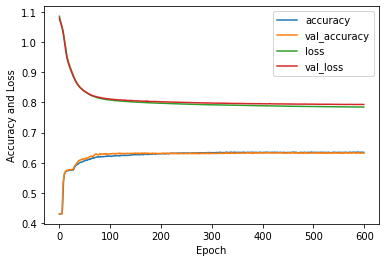

In [31]:
model_stats(History)

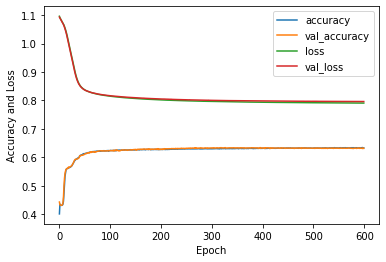

In [32]:
model_stats(History_1)

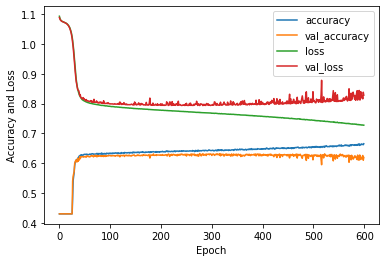

In [33]:
model_stats(History_2)

In [34]:
pred_data.replace({"HTR":{'H':1,'A':2,'D':0}},inplace=True)
pred_data = scaler.fit_transform(pred_data)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6666: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  regex=regex,


In [35]:
# pred_data = pd.DataFrame(pred_data,columns=['HTR','HS','AS','HST','HF','AF','HY','AY','HR','AR','HC','AC','AST'])
result=model.predict(pred_data)

In [36]:
type(result)

numpy.ndarray

In [37]:
model.predict_classes(pred_data[[2]])

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([1])

In [38]:
  Class_prediction=pd.DataFrame(model.predict_classes(pred_data))
  Class_prediction.replace({0:{1:'H',2:'A',0:'D'}},inplace=True)
  type(Class_prediction)
  # result=[]
  # for i in Class_prediction:
  #   if Class_prediction[i]==1:
  #     result.append('H')
  #   elif Class_prediction[i]==2:
  #     result.append('A')
  #   else:
  #     result.append('D')

pandas.core.frame.DataFrame

In [39]:
Class_prediction


,0
0,H
1,A
2,H
3,H
4,H
...,...
308,A
309,H
310,D
311,A


In [40]:
# print(Class_prediction)
# print(tester,type(tester))
# tester

In [41]:
prediction = tester[['HomeTeam','AwayTeam','FTR']]

result=pd.DataFrame(result)

prediction['Draw']=result[[0]]
prediction['Homewin']=result[[1]]
prediction['awaywin']=result[[2]]

prediction['Predicted result']=Class_prediction




/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

In [42]:
# prediction.replace({"Predicted result":{1:'H',2:'A',0:'D'}})

In [43]:
prediction.to_csv('gdrive/My Drive/Colab Notebooks/epl/log.csv',index=False)

In [44]:
# print(result[0,2])

In [45]:
print(prediction)

           HomeTeam          AwayTeam FTR  ...   Homewin   awaywin  Predicted result
0         Liverpool           Norwich   H  ...  0.843858  0.025708                 H
1          West Ham          Man City   A  ...  0.009865  0.922031                 A
2       Bournemouth  Sheffield United   D  ...  0.451155  0.188250                 H
3           Burnley       Southampton   H  ...  0.591384  0.096262                 H
4    Crystal Palace           Everton   D  ...  0.668478  0.075179                 H
..              ...               ...  ..  ...       ...       ...               ...
308     Southampton           Arsenal   A  ...  0.001801  0.964954                 A
309         Chelsea          Man City   H  ...  0.998382  0.000017                 H
310     Aston Villa            Wolves   A  ...  0.221179  0.334518                 D
311         Watford       Southampton   A  ...  0.002729  0.959257                 A
312  Crystal Palace           Burnley   A  ...  0.288222  0.33217

In [46]:
def single_predict(df,home,away):

  filtered_data = df[(df.HomeTeam == home) & (df.AwayTeam == away)]
  input_data= filtered_data[['HS','AS','HST','AST','HF','AF','HY','AY','HR','AR','HC','AC','HTR']]
  input_data.replace({"HTR":{'H':1,'A':2,'D':0}},inplace=True) 
  Predicted=pd.DataFrame(model.predict(input_data))

  classes=pd.DataFrame(model.predict_classes(input_data))

  classes=classes.replace({0:{1:'H',2:'A',0:'D'}})
  Predicted['Predicted result']=classes[0]
  Predicted['HomeTeam']=home
  Predicted['AwayTeam']=away


  return Predicted

In [50]:
def predictor(home,away):
  # ht='Liverpool'
  # at='Leicester'
  result=prediction[(prediction.HomeTeam == home) & (prediction.AwayTeam == away)]  #query in the dataframe
  
  if int(result.shape[0]) > 0:
    index=result.index[0]
    print("The actual FTR is ",(result['FTR'][index]))
    if (result['Predicted result'][index])=='H':
      print("The predicted winner: ",home)
    else:
      print("The predicted winner: ",away)
  else:
    print("Prediction using data from previous matches")
    file_path= path + '/dataset/recent.csv'
    old_data = pd.read_csv(file_path)
    P = single_predict(old_data,home,away)
    print(P['Predicted result'][0])
    display(P)



In [52]:
path='gdrive/My Drive/Colab Notebooks/epl'

In [56]:
predictor('Liverpool','Chelsea')

Prediction using data from previous matches
A


/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6666: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  regex=regex,


,0,1,2,Predicted result,HomeTeam,AwayTeam
0,0.023296,0.052899,0.923804,A,Liverpool,Chelsea


In [57]:
# predictor('Liverpool','Liverpool')

In [54]:
prediction

,HomeTeam,AwayTeam,FTR,Draw,Homewin,awaywin,Predicted result
0,Liverpool,Norwich,H,0.130434,0.843858,0.025708,H
1,West Ham,Man City,A,0.068104,0.009865,0.922031,A
2,Bournemouth,Sheffield United,D,0.360595,0.451155,0.188250,H
3,Burnley,Southampton,H,0.312354,0.591384,0.096262,H
4,Crystal Palace,Everton,D,0.256343,0.668478,0.075179,H
...,...,...,...,...,...,...,...
308,Southampton,Arsenal,A,0.033244,0.001801,0.964954,A
309,Chelsea,Man City,H,0.001601,0.998382,0.000017,H
310,Aston Villa,Wolves,A,0.444303,0.221179,0.334518,D
311,Watford,Southampton,A,0.038014,0.002729,0.959257,A
